# 导入需要的库

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from knnClassify import*

# 引入数据集

In [3]:
abalone = pd.read_csv('abalone.data', sep = ',')

# 查abalone.names之后，得到所有的标签：Sex，Length，Diameter，Height，Whole weight，Shucked weight，Viscera weight，Shell weight，Rings

In [4]:
abalone_data = pd.read_csv('abalone.data', names = ["Sex", "Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"], sep = ',')

In [5]:
abalone_data = np.array(abalone_data)
abalone_data

array([['M', 0.455, 0.365, ..., 0.101, 0.15, 15],
       ['M', 0.35, 0.265, ..., 0.0485, 0.07, 7],
       ['F', 0.53, 0.42, ..., 0.1415, 0.21, 9],
       ...,
       ['M', 0.6, 0.475, ..., 0.2875, 0.308, 9],
       ['F', 0.625, 0.485, ..., 0.261, 0.296, 10],
       ['M', 0.71, 0.555, ..., 0.3765, 0.495, 12]], dtype=object)

In [6]:
y = abalone_data[:,0]
Y = abalone_data[:,8]
x = abalone_data[:,1:8]

### y = abalone_data['Rings']
### Y = abalone_data['Sex']
### x = abalone_data[['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']]

In [7]:
x

array([[0.455, 0.365, 0.095, ..., 0.2245, 0.101, 0.15],
       [0.35, 0.265, 0.09, ..., 0.0995, 0.0485, 0.07],
       [0.53, 0.42, 0.135, ..., 0.2565, 0.1415, 0.21],
       ...,
       [0.6, 0.475, 0.205, ..., 0.5255, 0.2875, 0.308],
       [0.625, 0.485, 0.15, ..., 0.531, 0.261, 0.296],
       [0.71, 0.555, 0.195, ..., 0.9455, 0.3765, 0.495]], dtype=object)

In [8]:
# 创建一个最值归一化对象
scaler = MinMaxScaler()
# 归一化之后，进行赋值
x = scaler.fit_transform(x)

In [9]:
x

array([[0.51351351, 0.5210084 , 0.0840708 , ..., 0.15030262, 0.1323239 ,
        0.14798206],
       [0.37162162, 0.35294118, 0.07964602, ..., 0.06624075, 0.06319947,
        0.06826109],
       [0.61486486, 0.61344538, 0.11946903, ..., 0.17182246, 0.18564845,
        0.2077728 ],
       ...,
       [0.70945946, 0.70588235, 0.18141593, ..., 0.3527236 , 0.37788018,
        0.30543099],
       [0.74324324, 0.72268908, 0.13274336, ..., 0.35642233, 0.34298881,
        0.29347285],
       [0.85810811, 0.84033613, 0.17256637, ..., 0.63517149, 0.49506254,
        0.49177877]])

In [10]:
y

array(['M', 'M', 'F', ..., 'M', 'F', 'M'], dtype=object)

In [11]:
set(y)

{'F', 'I', 'M'}

In [12]:
Y

array([15, 7, 9, ..., 9, 10, 12], dtype=object)

In [13]:
set(Y)

{1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 29}

#### 怎么这么多个指标？

### 成效不太好，思考了一下是rings中共有29个分类，然后样本量相较太小了，分类界限太模糊，容易导致分类错误

#### 对rings这个子集数据做了一个小分类，减少分类，提高预测准确度

In [14]:
Y_change = [int(a/5) for a in Y]

In [15]:
Y_change = np.array(Y_change)

In [16]:
set(Y_change)

{0, 1, 2, 3, 4, 5}

In [17]:
np.sum(Y_change==0)

74

In [18]:
np.sum(Y_change==1)

2022

In [19]:
np.sum(Y_change==2)

1717

In [20]:
#将未做处理和做好处理的两列矩阵合并（方便后边使用）
Y = np.c_[Y,Y_change]

# 对数据集进行划分：这里划分20%为预测集、80%为训练集,随机数种子设置为1

## 1、对性别Sex进行训练并预测

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [22]:
test = knnClassify(155)
test.fit(x_train, y_train)
y_predict = test.predict(x_test)
test.score(y_test, y_predict)

0.5550239234449761

## 2、对年龄rings进行训练并预测

In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(x, Y, test_size = 0.2, random_state = 1)

In [24]:
test = knnClassify(25)
test.fit(X_train, Y_train[:,1])
Y_predict = test.predict(X_test)
test.score(Y_test[:,1], Y_predict)

0.6925837320574163

# 将预测结果可视化

## 1.对SEX预测结果可视化

In [25]:
# 设置画布大小
plt.figure(figsize = (10, 10))

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

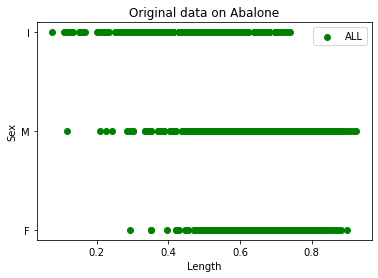

In [26]:
# 随机选取a和b作为坐标轴
#对Sex三个属性上色
plt.scatter(x = x_test[:,1], y = y_test, color = 'Green', label = 'ALL')
plt.xlabel('Length')
plt.ylabel('Sex')
plt.title("Original data on Abalone")
plt.legend()
plt.show()

#### 图中展示的是还未预测的所有数据点集

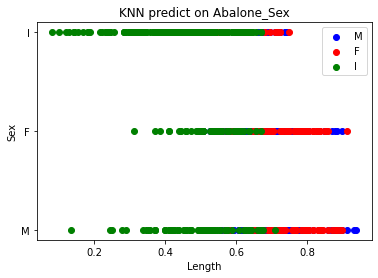

In [27]:
x_mPredict = []
y_mPredict = []
x_fPredict = []
y_fPredict = []
x_iPredict = []
y_iPredict = []
for i in range(0, len(x_test)):
    if(y_predict[i] == 'M'):
        x_mPredict.append(x_test[i])
        y_mPredict.append(y_test[i])
    if(y_predict[i] == 'F'):
        x_fPredict.append(x_test[i])
        y_fPredict.append(y_test[i])
    if(y_predict[i] == 'I'):
        x_iPredict.append(x_test[i])
        y_iPredict.append(y_test[i])
x_mPredict = np.array(x_mPredict)
x_fPredict = np.array(x_fPredict)
x_iPredict = np.array(x_iPredict)
y_mPredict = np.array(y_mPredict)
y_fPredict = np.array(y_fPredict)
y_iPredict = np.array(y_iPredict)
plt.scatter(x = x_mPredict[:,0], y = y_mPredict, color = 'blue', label = 'M')
plt.scatter(x = x_fPredict[:,0], y = y_fPredict, color = 'red', label = 'F')
plt.scatter(x = x_iPredict[:,0], y = y_iPredict, color = 'green', label = 'I')
plt.xlabel('Length')
plt.ylabel('Sex')
plt.title("KNN predict on Abalone_Sex")
plt.legend()
plt.show()

#### 图中共有三个预测分类

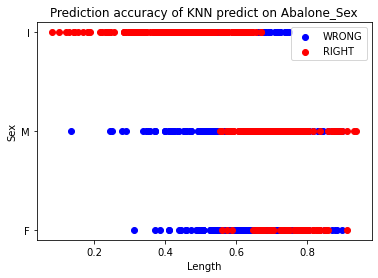

In [28]:
x_right = x_test[y_predict == y_test]
y_right = y_test[y_predict == y_test]
x_wrong = x_test[y_predict != y_test]
y_wrong = y_test[y_predict != y_test]
plt.scatter(x = x_wrong[:,0], y = y_wrong, color = 'blue', label = 'WRONG')
plt.scatter(x = x_right[:,0], y = y_right, color = 'red', label = 'RIGHT')
plt.xlabel('Length')
plt.ylabel('Sex')
plt.title("Prediction accuracy of KNN predict on Abalone_Sex")
plt.legend()
plt.show()

#### 图中红色表示预测成功

## 2.对Rings进行预测

In [29]:
# 设置画布大小
plt.figure(figsize = (100, 100))

<Figure size 7200x7200 with 0 Axes>

<Figure size 7200x7200 with 0 Axes>

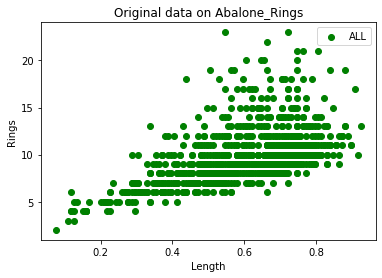

In [30]:
# 随机选取a和b作为坐标轴
#对Sex三个属性上色
plt.scatter(x = X_test[:,1], y = Y_test[:,0], color = 'Green', label = 'ALL')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.title("Original data on Abalone_Rings")
plt.legend()
plt.show()

#### 图中展示的是还未预测的所有数据点集

In [31]:
x_aPredict = []
y_aPredict = []
x_bPredict = []
y_bPredict = []
x_cPredict = []
y_cPredict = []
x_dPredict = []
y_dPredict = []
x_ePredict = []
y_ePredict = []
x_fPredict = []
y_fPredict = []
for i in range(0, len(X_test)):
    if(Y_predict[i] == 0):
        x_aPredict.append(X_test[i])
        y_aPredict.append(Y_test[i][0])
    if(Y_predict[i] == 1):
        x_bPredict.append(X_test[i])
        y_bPredict.append(Y_test[i][0])
    if(Y_predict[i] == 2):
        x_cPredict.append(X_test[i])
        y_cPredict.append(Y_test[i][0])
    if(Y_predict[i] == 3):
        x_dPredict.append(X_test[i])
        y_dPredict.append(Y_test[i][0])
    if(Y_predict[i] == 4):
        x_ePredict.append(X_test[i])
        y_ePredict.append(Y_test[i][0])
    if(Y_predict[i] == 5):
        x_fPredict.append(X_test[i])
        y_fPredict.append(Y_test[i][0])
x_aPredict = np.array(x_aPredict)
x_bPredict = np.array(x_bPredict)
x_cPredict = np.array(x_cPredict)
x_dPredict = np.array(x_dPredict)
x_ePredict = np.array(x_ePredict)
x_fPredict = np.array(x_fPredict)
y_aPredict = np.array(y_aPredict)
y_bPredict = np.array(y_bPredict)
y_cPredict = np.array(y_cPredict)
y_dPredict = np.array(y_dPredict)
y_ePredict = np.array(y_ePredict)
y_fPredict = np.array(y_fPredict)

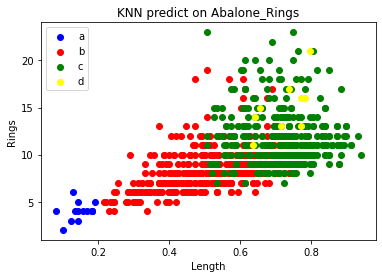

In [32]:
plt.scatter(x = x_aPredict[:,0], y = y_aPredict, color = 'blue', label = 'a')
plt.scatter(x = x_bPredict[:,0], y = y_bPredict, color = 'red', label = 'b')
plt.scatter(x = x_cPredict[:,0], y = y_cPredict, color = 'green', label = 'c')
plt.scatter(x = x_dPredict[:,0], y = y_dPredict, color = 'yellow', label = 'd')
#plt.scatter(x = x_ePredict[:,0], y = y_ePredict, color = 'cyan', label = 'e')
#plt.scatter(x = x_fPredict[:,0], y = y_fPredict, color = 'pink', label = 'f')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.title("KNN predict on Abalone_Rings")
plt.legend()
plt.show()

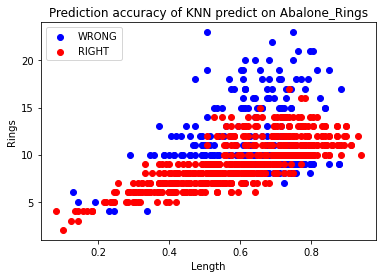

In [33]:
X_right = X_test[Y_predict == Y_test[:,1]]
Y_right = Y_test[Y_predict == Y_test[:,1]]
X_wrong = X_test[Y_predict != Y_test[:,1]]
Y_wrong = Y_test[Y_predict != Y_test[:,1]]
plt.scatter(x = X_wrong[:,0], y = Y_wrong[:,0], color = 'blue', label = 'WRONG')
plt.scatter(x = X_right[:,0], y = Y_right[:,0], color = 'red', label = 'RIGHT')
plt.xlabel('Length')
plt.ylabel('Rings')
plt.title("Prediction accuracy of KNN predict on Abalone_Rings")
plt.legend()
plt.show()